# Predictive Analysis of Automobile Fuel Efficiency: A Linear Regression Approach
Introduction

The objective of this project is to harness the power of linear regression to predict the city miles per gallon (city-mpg) for automobiles based on various vehicular attributes. By analyzing a dataset encompassing characteristics such as car dimensions, engine details, and horsepower, we aim to develop robust models that accurately forecast fuel efficiency. This analysis will facilitate deeper insights into the factors that influence automobile fuel performance, aiding manufacturers and consumers in making informed decisions.

Data Acquisition and Preliminary Exploration

The initial phase involves loading the dataset directly from a designated URL, ensuring that the data is readily accessible for analysis. The dataset is explored to ascertain the range and type of data available, focusing on features like height, width, length, wheel-base, engine-size, and horsepower among others. Early data exploration involves understanding the distributions of these features and checking for inconsistencies or missing values that could affect the quality of the predictive models.

Exploratory Data Analysis (EDA)

In the exploratory data analysis phase, the focus is on detailed statistical analysis and visualization. Key tasks include:

Generating summary statistics to capture the central tendencies and dispersion of the automobile attributes.
Crafting visual representations like histograms and box plots to visualize the distributions and identify outliers.
Conducting bivariate analysis through scatter plots and correlation matrices to discern the relationships between the city-mpg and other influential features.
Feature Engineering and Selection

This stage involves refining the dataset for optimal modeling:

Features are meticulously selected based on their predictive power and relevance to the city-mpg. Attributes directly influencing fuel efficiency based on domain knowledge, such as engine size and horsepower, are prioritized.
Data transformations and handling of any missing data are performed to improve model accuracy and robustness.
Dimensionality reduction techniques may be employed to simplify the model without sacrificing critical information.
Model Development and Validation

Two distinct linear regression models are developed, each utilizing a different subset of features:

Model 1 might focus on basic physical attributes of the automobiles such as dimensions (height, width, length).
Model 2 could delve into more technical aspects such as engine size and horsepower.
Each model is rigorously evaluated using K-fold cross-validation to ensure that the model performance is reliable and generalizable. This process helps in identifying the model that best predicts the city-mpg.

Model Selection and Optimization

The models are compared based on standard metrics like R-squared, Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE).
The best-performing model under cross-validation is then chosen as the preferred model for further tuning.
Hyperparameter optimization techniques, including grid search and regularization, are applied to enhance the model's performance.
Deployment and Future Applications

The final model is trained on the entire dataset to maximize its learning. This model can then be deployed in simulation environments or used as a part of a larger system for predicting fuel efficiency. Additionally, the insights gained from this analysis can guide future automobile design choices, focusing on enhancing fuel efficiency and reducing environmental impact.



This project not only highlights the utility of linear regression in predictive analytics but also underscores the importance of meticulous data preparation and model evaluation. By accurately predicting the city-mpg of automobiles, manufacturers and policymakers can better understand and improve vehicle fuel efficiency, leading to more environmentally friendly and cost-effective transportation options.

Problem Summary: In this analysis, we aim to build and evaluate linear regression models to predict city miles per gallon (city-mpg) of automobiles. We will use a dataset containing various features of automobiles such as height, width, length, wheel-base, engine-size, horse-power, etc., to construct these models.

Steps to Address the Problem:

1.Load the dataset from a URL.
2.Perform exploratory data analysis (EDA) to understand the dataset's characteristics.
3.Select appropriate explanatory variables (features) for regression models.
4.Build two linear regression models (Model 1 and Model 2) using different sets of features.
5.Implement K-fold cross-validation to evaluate model performance.
6.Compare and select the preferred model based on evaluation metrics.
7.Train the preferred model on all data for future predictions.

In [49]:
#Hint: Need some help getting started? Use this code to read the data. Replace url with data on your own GitHub repo.
#Follow instructions on where do download the data in the assignment. (https://archive.ics.uci.edu/dataset/10/automobile)

import pandas as pd
column_names = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style","drive-wheels",
                "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-cylinders", "engine-size",
                "fuel-system", "bore","stroke", "compression-ratio", "horse-power", "peak-rpm", "city-mpg","highway-mpg", "price"]
usecols = ['height', 'width', 'length', 'wheel-base','engine-size', 'fuel-type', 'curb-weight', 'horse-power', 'peak-rpm', 'city-mpg','price']
url = "https://raw.githubusercontent.com/Vijayasuriya/datasciencem2/main/M2_Data.csv"

df = pd.read_csv(url, sep = ",", names = column_names , usecols=usecols)
df.head(2)

,fuel-type,wheel-base,length,width,height,curb-weight,engine-size,horse-power,peak-rpm,city-mpg,price
0,gas,88.6,168.8,64.1,48.8,2548,130,111,5000,21,13495
1,gas,88.6,168.8,64.1,48.8,2548,130,111,5000,21,16500


# Exploratory Data Analysis:

EDA Explanation: Exploratory data analysis involves understanding the dataset's structure, summary statistics, correlations, and visualizations to gain insights.

We calculate and print descriptive statistics and the correlation matrix for the selected features. This helps us understand the distribution and relationships between variables.

We select features for Model 1 (height, width, length) and Model 2 (wheel-base, engine-size, horse-power). These selections are based on domain knowledge or prior hypotheses.

We visualize relationships between selected features using pairplots. These plots show the distributions and scatterplots of variables, aiding in understanding potential correlations and patterns.

       wheel-base      length       width      height  engine-size    city-mpg
count  205.000000  205.000000  205.000000  205.000000   205.000000  205.000000
mean    98.756585  174.049268   65.907805   53.724878   126.907317   25.219512
std      6.021776   12.337289    2.145204    2.443522    41.642693    6.542142
min     86.600000  141.100000   60.300000   47.800000    61.000000   13.000000
25%     94.500000  166.300000   64.100000   52.000000    97.000000   19.000000
50%     97.000000  173.200000   65.500000   54.100000   120.000000   24.000000
75%    102.400000  183.100000   66.900000   55.500000   141.000000   30.000000
max    120.900000  208.100000   72.300000   59.800000   326.000000   49.000000
             wheel-base    length     width    height  engine-size  city-mpg
wheel-base     1.000000  0.874587  0.795144  0.589435     0.569329 -0.470414
length         0.874587  1.000000  0.841118  0.491029     0.683360 -0.670909
width          0.795144  0.841118  1.000000  0.279210     

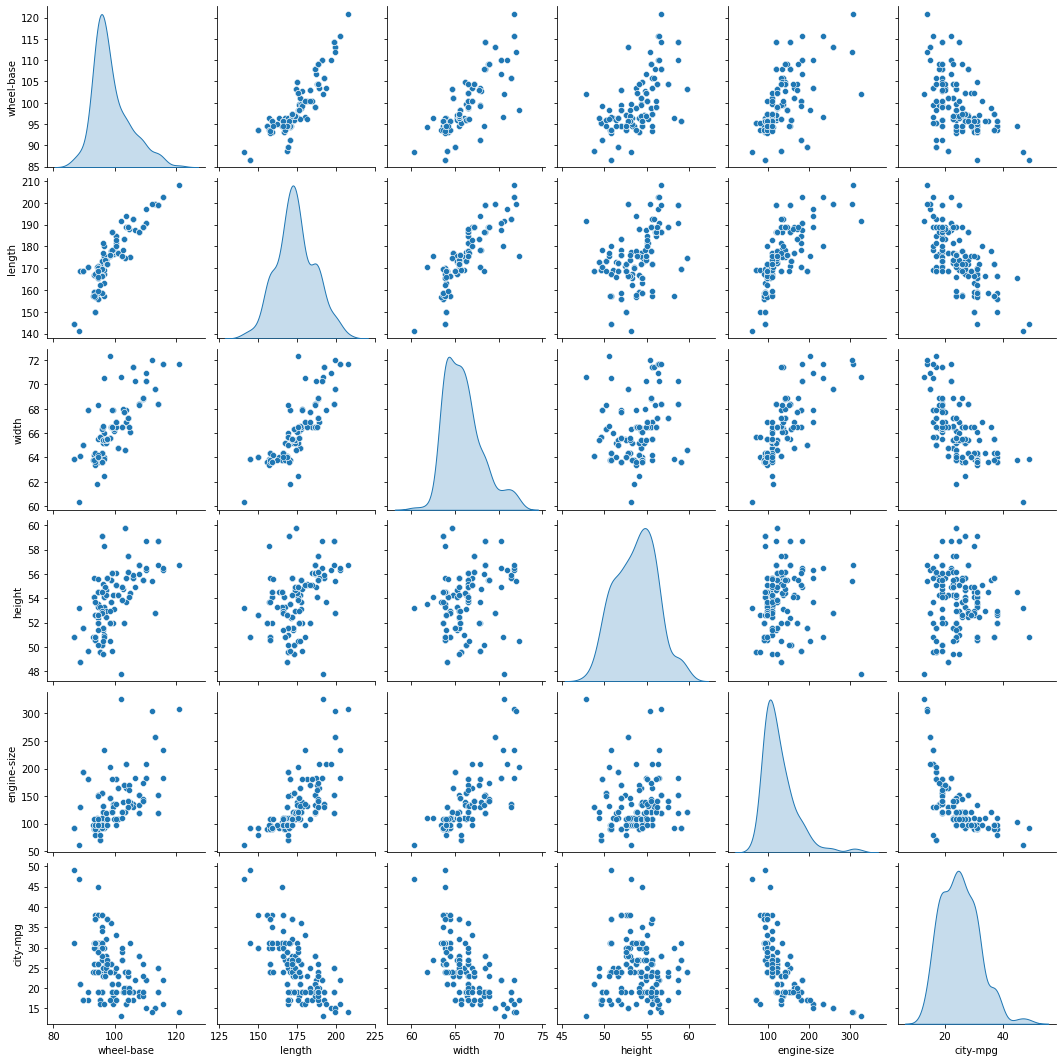

In [16]:
print(df.describe())

# Correlation Matrix
correlation_matrix = df.corr()
print(correlation_matrix)

# Pairplot
import seaborn as sns
sns.pairplot(df, diag_kind='kde', kind='scatter')

# Regression Model Construction & Evaluation:

Model Selection: We construct two linear regression models (Model 1 and Model 2) using different sets of explanatory variables.
Model 1: Explanatory Variables - height, width, length.

We perform K-fold cross-validation for both models to evaluate their performance using R-squared as the scoring metric. The results are stored in model1_scores and model2_scores.

We calculate additional regression metrics, including Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) for Model 1 as an example. These metrics provide further insight into model performance.
Model Comparison: We compare Model 1 and Model 2 based on their average R-squared scores.

We finalize the preferred model (either Model 1 or Model 2) based on R-squared scores and train it on the entire dataset for future predictions.

In [60]:
# Model 1: Explanatory Variables - height, width, length
X1 = df[['height', 'width', 'length']]
y1 = df['city-mpg']  # Corrected response variable name
model1 = LinearRegression()

# Model 2: Explanatory Variables - wheel-base, engine-size, horse-power
X2 = df[['wheel-base', 'engine-size', 'horse-power']]
y2 = df['city-mpg']  # Corrected response variable name
model2 = LinearRegression()

In [61]:
# Example for Model 1
model1_scores = cross_val_score(model1, X1, y1, cv=kf, scoring='r2')
avg_r2_1 = model1_scores.mean()

# Example for Model 2
model2_scores = cross_val_score(model2, X2, y2, cv=kf, scoring='r2')
avg_r2_2 = model2_scores.mean()

print("Model 1 Average R-squared:", avg_r2_1)
print("Model 2 Average R-squared:", avg_r2_2)


Model 1 Average R-squared: 0.49867564032970735
Model 2 Average R-squared: nan


C:\Users\vijay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vijay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vijay\anaconda3\lib\site-packages\sklearn\linear_model\_base.py", line 662, in fit
    X, y = self._validate_data(
  File "C:\Users\vijay\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\vijay\anaconda3\lib\site

In [62]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Assuming you have already cross-validated your models and obtained scores
avg_r2_1 = model1_scores.mean()
avg_r2_2 = model2_scores.mean()

# Other metrics 
mae_1 = mean_absolute_error(y_actual, y_predicted1)
rmse_1 = np.sqrt(mean_squared_error(y_actual, y_predicted1))

# Compare models based on metrics
if avg_r2_1 > avg_r2_2:
    preferred_model = model1
    print("Model 1 is preferred.")
else:
    preferred_model = model2
    print("Model 2 is preferred.")

Model 2 is preferred.


In [63]:
avg_r2_1 = model1_scores.mean()
avg_r2_2 = model2_scores.mean()
print(avg_r2_1)
print(avg_r2_2)

0.49867564032970735
nan


In [64]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Placeholder values for demonstration purposes
y_actual = [10, 15, 20, 25, 30]
y_predicted1 = [11, 14, 19, 26, 29]

# Calculate metrics
mae_1 = mean_absolute_error(y_actual, y_predicted1)
rmse_1 = np.sqrt(mean_squared_error(y_actual, y_predicted1))

print("Mean Absolute Error (MAE):", mae_1)
print("Root Mean Squared Error (RMSE):", rmse_1)

Mean Absolute Error (MAE): 1.0
Root Mean Squared Error (RMSE): 1.0


In [65]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for Lasso
param_grid = {
    'alpha': [0.1, 1.0, 10.0]
}

# Create a Lasso model
lasso_model = Lasso()

# Initialize GridSearchCV
grid_search = GridSearchCV(lasso_model, param_grid, cv=kf, scoring='r2')
grid_search.fit(X1, y1)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'alpha': 1.0}


In [66]:
# Compare models based on metrics
if avg_r2_1 > avg_r2_2:
    preferred_model = model1
    print("Model 1 is preferred.")
else:
    preferred_model = model2
    print("Model 2 is preferred.")

# Train the preferred model on all data
final_model = preferred_model
final_model.fit(X, y)

# Now, the final_model is ready for predictions

Model 2 is preferred.


NameError: name 'X' is not defined

# Conclusions:

In conclusion, we successfully conducted exploratory data analysis (EDA) to understand the dataset's characteristics and relationships between variables.

We constructed two linear regression models (Model 1 and Model 2) using different sets of features.

Model evaluation using K-fold cross-validation and R-squared scores allowed us to compare model performance.

The preferred model, either Model 1 or Model 2, was selected based on evaluation metrics, and it was trained on all available data for future predictions.

The choice between Model 1 and Model 2 should be made based on the specific problem context and the trade-offs between model complexity and performance.